In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pylab as pl
import csv # csv module
import warnings #for disable purpose
import seaborn as sns #library for making statistical graphics
import os # for current directory
import glob
from sklearn.tree import DecisionTreeClassifier #For predict decision trees
from sklearn.model_selection import train_test_split, GridSearchCV #Split data
from sklearn.ensemble import RandomForestClassifier#Random forests
from sklearn import datasets #Random forests
from sklearn.cluster import KMeans #Library for clusters
from sklearn.preprocessing import MinMaxScaler#Used in clusters
from scipy import stats#for correlation
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pathlib import Path
warnings.filterwarnings('ignore')
from matplotlib.ticker import FuncFormatter

In [5]:
################################################ Merge of the 6 excel files#######################################
base_dir = Path.home()
gopi_source_directory_path = base_dir / "NaMinhaRua" / "Ficheiros de dados originais" / "GOPI"
# Alterar a directoria atual para um diretório específico
os.chdir(gopi_source_directory_path)
# Aceder a lista de ficheiros excel
excel_files = glob.glob('*.xlsx')

newDataSet = []
# Iterar por cada ficheiro e adicionar ao novo dataset
for file in excel_files:
    df = pd.read_excel(file)
    newDataSet.append(df)
# Merge das 6 base de dados para uma só
combined_df = pd.concat(newDataSet, ignore_index=True)
manipulated_data_directory = base_dir / "NaMinhaRua" / "Ficheiros de dados Manipulados"
# Escrever o resultado do merge par um csv
combined_df.to_csv(manipulated_data_directory / 'combined_gopi_data.csv', sep=',', index=False)

In [10]:
pd.options.display.max_rows = 9999999999 # Maximum number of rows
#////////////////////////////////////////////////////////Import Dataset/////////////////////////////////////////////////////////////
csv_path=manipulated_data_directory
gopidataset = pd.read_csv(csv_path / 'combined_gopi_data.csv')
gopidataset = pd.DataFrame(gopidataset)
print ("\nMissing values :  ", gopidataset.isnull().sum().values.sum())


Missing values :   0


In [11]:
#Dataset header
gopidataset.head(10)

,dt_registo,area,tipo,Subseccao,Freguesia,Longitude_Subseccao,Latitude_Subseccao
0,2018-07-09,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11065602102,Arroios,-9.137543,38.735172
1,2018-09-26,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11061801202,Lumiar,-9.156491,38.760882
2,2018-05-03,Estradas e Sinalização,Buraco na faixa de rodagem - Cubos,11066601001,Santo António,-9.148483,38.718482
3,2018-12-26,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11065603102,Arroios,-9.138957,38.731098
4,2018-01-23,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11065602510,Arroios,-9.137579,38.725782
5,2018-03-20,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11061000901,Campolide,-9.165829,38.725873
6,2018-05-09,Higiene Urbana,Remoção-Jardins-Pedido de recolha,11065700801,Avenidas Novas,-9.143172,38.738217
7,2018-01-08,Higiene Urbana,Remoção-Monstros-Pedido de recolha,11066700601,São Vicente,-9.122044,38.717322
8,2018-03-12,Higiene Urbana,"Entulhos, objetos volumosos, resíduos de jardi...",11063903001,São Domingos de Benfica,-9.177100,38.753999
9,2018-03-06,Segurança Pública e Ruído,Insegurança na via pública,11061803101,Lumiar,-9.171726,38.760831


In [ ]:
#RowsXColumns Info
print("\nData base dimensions :", gopidataset.shape)
print("\nData base info:")
gopidataset.info()

In [9]:
# Sort the DataFrame by the date column [dt_registo]
gopidataset_sorted = gopidataset.sort_values(by='dt_registo')
# Write the combined DataFrame to a single file in CSV file
gopidataset_sorted.to_csv(manipulated_data_directory / 'combined_sorted_gopi_data.csv', sep=',', index=False)

In [6]:
#Dataset header
gopidataset_sorted.head(10)

,dt_registo,area,tipo,Subseccao,Freguesia,Longitude_Subseccao,Latitude_Subseccao
21895,2018-01-01,Iluminação Pública,Candeeiro apagado,11066202005,Parque das Nações,-9.092716,38.779538
59036,2018-01-01,Árvores e Espaços Verdes,"Árvores, arbustos ou relva - Manutenção",11061802202,Lumiar,-9.157347,38.772386
47078,2018-01-01,Higiene Urbana,"Entulhos, objetos volumosos, resíduos de jardi...",11065602201,Arroios,-9.132690,38.726957
71241,2018-01-01,Higiene Urbana,Resíduos em torno de ecoponto e vidrões,11066601201,Santo António,-9.146162,38.721332
22369,2018-01-01,Higiene Urbana,Limpeza da via pública,11060200605,Alcântara,-9.182846,38.700985
21694,2018-01-01,Higiene Urbana,Contentores de resíduos danificados,11063301908,Olivais,-9.107819,38.770550
54974,2018-01-01,Higiene Urbana,Resíduos em torno de ecoponto e vidrões,11063901603,São Domingos de Benfica,-9.168751,38.746080
120741,2018-01-01,Higiene Urbana,"Entulhos, objetos volumosos, resíduos de jardi...",11065701401,Avenidas Novas,-9.148307,38.743855
21080,2018-01-01,Passeios e Acessibilidades,Pilaretes - Manutenção,11065800803,Belém,-9.214691,38.694393
41606,2018-01-01,Segurança Pública e Ruído,"Edifício, muro, escarpa ou talude degradado",11066100705,Misericórdia,-9.152499,38.708949


In [12]:
pd.options.display.max_rows = 9999999999 #to ensure that all rows are considered
#////////////////////////////////////////////////////////Import Dataset with worked data/////////////////////////////////////////////////////////////
gopidataset = pd.read_csv(csv_path / 'combined_sorted_gopi_data.csv')
gopidataset = pd.DataFrame(gopidataset)
print ("\nMissing values :  ", gopidataset.isnull().sum().values.sum())


Missing values :   0


In [13]:
#Dataset header
gopidataset.head(10)

,dt_registo,area,tipo,Subseccao,Freguesia,Longitude_Subseccao,Latitude_Subseccao
0,2018-01-01,Iluminação Pública,Candeeiro apagado,11066202005,Parque das Nações,-9.092716,38.779538
1,2018-01-01,Árvores e Espaços Verdes,"Árvores, arbustos ou relva - Manutenção",11061802202,Lumiar,-9.157347,38.772386
2,2018-01-01,Higiene Urbana,"Entulhos, objetos volumosos, resíduos de jardi...",11065602201,Arroios,-9.132690,38.726957
3,2018-01-01,Higiene Urbana,Resíduos em torno de ecoponto e vidrões,11066601201,Santo António,-9.146162,38.721332
4,2018-01-01,Higiene Urbana,Limpeza da via pública,11060200605,Alcântara,-9.182846,38.700985
5,2018-01-01,Higiene Urbana,Contentores de resíduos danificados,11063301908,Olivais,-9.107819,38.770550
6,2018-01-01,Higiene Urbana,Resíduos em torno de ecoponto e vidrões,11063901603,São Domingos de Benfica,-9.168751,38.746080
7,2018-01-01,Higiene Urbana,"Entulhos, objetos volumosos, resíduos de jardi...",11065701401,Avenidas Novas,-9.148307,38.743855
8,2018-01-01,Passeios e Acessibilidades,Pilaretes - Manutenção,11065800803,Belém,-9.214691,38.694393
9,2018-01-01,Segurança Pública e Ruído,"Edifício, muro, escarpa ou talude degradado",11066100705,Misericórdia,-9.152499,38.708949


In [14]:
#RowsXColumns Info
print("\nData base dimensions :", gopidataset.shape)
print("\nData base info:")
gopidataset.info()


Data base dimensions : (774072, 7)

Data base info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774072 entries, 0 to 774071
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dt_registo           774072 non-null  object 
 1   area                 774072 non-null  object 
 2   tipo                 774072 non-null  object 
 3   Subseccao            774072 non-null  int64  
 4   Freguesia            774072 non-null  object 
 5   Longitude_Subseccao  774072 non-null  float64
 6   Latitude_Subseccao   774072 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 41.3+ MB


In [15]:
#Check the quantity of different type of values for each attribute
print ("\nUnique values :  \n",gopidataset.nunique())


Unique values :  
 dt_registo             2191
area                      9
tipo                    264
Subseccao              2822
Freguesia                24
Longitude_Subseccao    2822
Latitude_Subseccao     2822
dtype: int64


In [16]:
#Detailed info for attributes
print("------------------------Freguesia------------------------\n")
#print(gopidataset_sorted.Freguesia.value_counts(normalize=True) * 100)

#Concatenate the value counts and frequency_percentage into a DataFrame
valueCounts = gopidataset.Freguesia.value_counts()
frequencyPercentage = (valueCounts / len(gopidataset)) * 100
result_df = pd.concat([valueCounts, frequencyPercentage], axis=1)
result_df.columns = ['Absolute Count', 'Frequency (%)']
print(result_df)

------------------------Freguesia------------------------

                         Absolute Count  Frequency (%)
Freguesia                                             
Arroios                           64416       8.321707
Alvalade                          63546       8.209314
Avenidas Novas                    56958       7.358230
Lumiar                            47693       6.161313
Olivais                           42945       5.547934
Benfica                           42858       5.536694
Santo António                     42056       5.433086
Estrela                           40443       5.224708
São Domingos de Benfica           34164       4.413543
Campo de Ourique                  33290       4.300634
Santa Maria Maior                 33231       4.293012
Penha de França                   32434       4.190050
Areeiro                           32389       4.184236
Belém                             31411       4.057891
Misericórdia                      29551       3.817604
São Vi

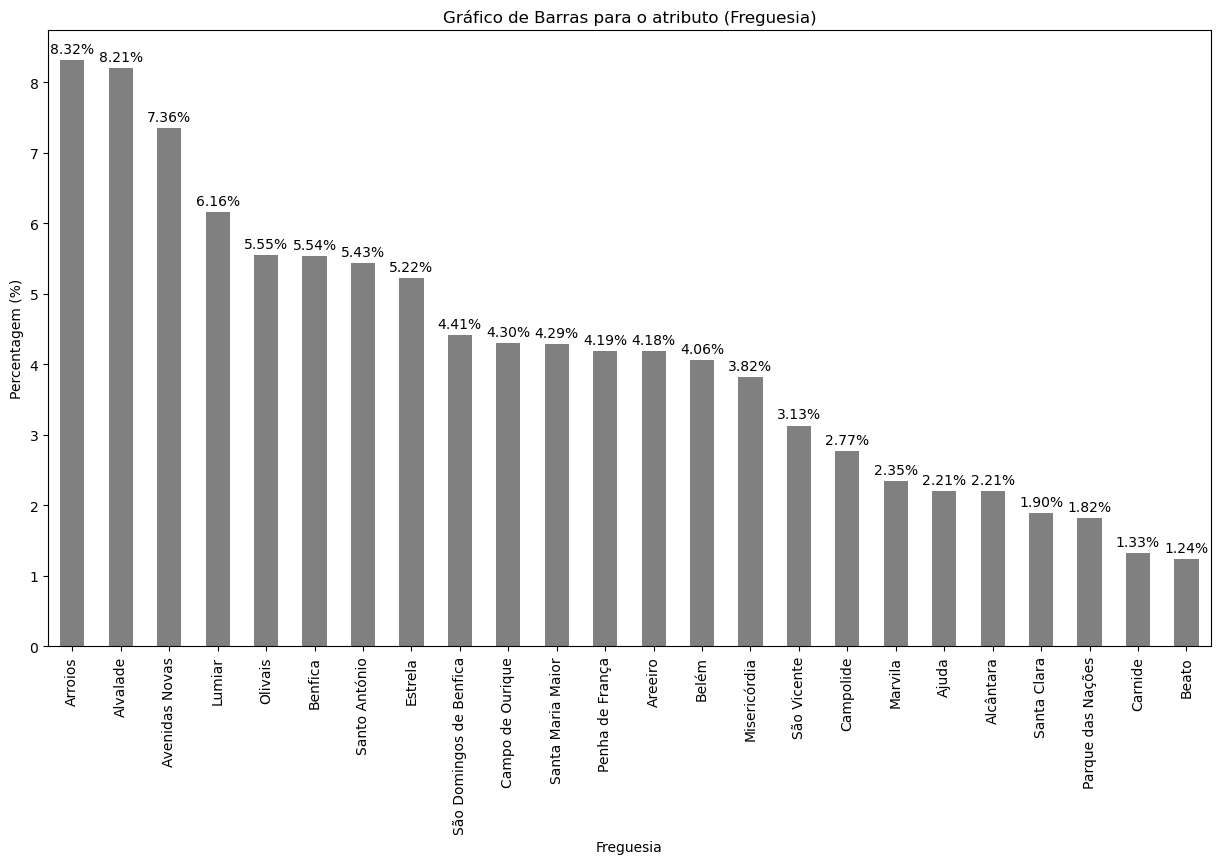

In [17]:
# Check the value per "Freguesia"
value_counts = gopidataset.Freguesia.value_counts()

# Calculate %
total = value_counts.sum()
percentages = (value_counts / total) * 100

# Bar plot
plt.figure(figsize=(15, 8))
percentages.plot(kind='bar', color='grey')

# X&Y titles
plt.xlabel('Freguesia')
plt.ylabel('Percentagem (%)')
plt.title('Gráfico de Barras para o atributo (Freguesia)')

# Adding % at the top of the bars
for index, value in enumerate(percentages):
    plt.text(index, value + 0.1, f'{value:.2f}%', ha='center')

# Print the plot
plt.show()

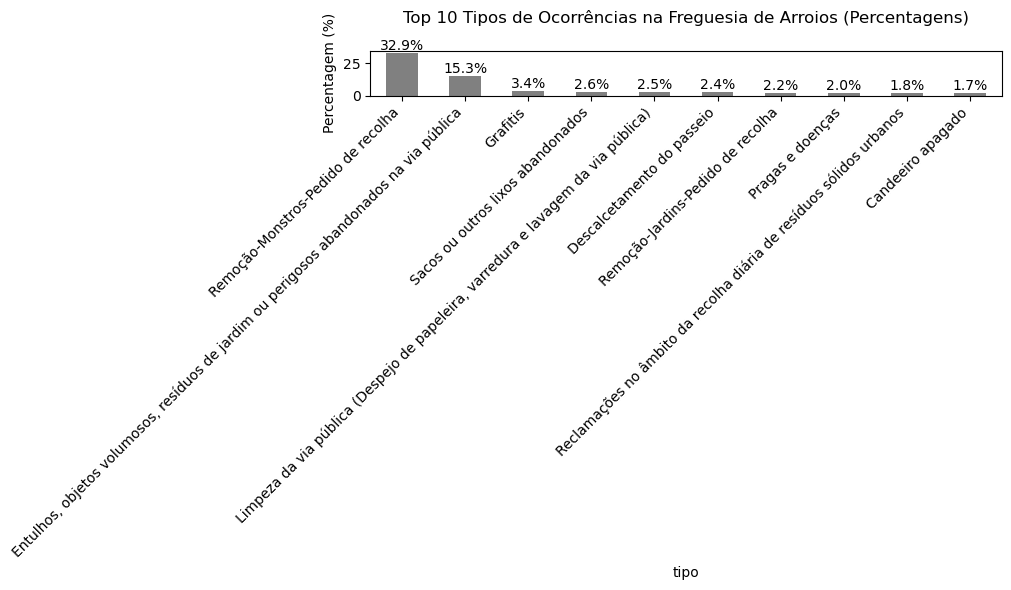

In [18]:
# Data filter for "Arroios" parish
freguesia_arroios = gopidataset[gopidataset['Freguesia'] == 'Arroios']



plt.figure(figsize=(10, 6))
# Calculate %
top_tipos_percent = (freguesia_arroios['tipo'].value_counts(normalize=True) * 100).head(10)
bars = top_tipos_percent.plot(kind='bar', color='grey')

# Add % to the top bar
for bar in bars.containers[0]:
    height = bar.get_height()
    bars.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom')

plt.title('Top 10 Tipos de Ocorrências na Freguesia de Arroios (Percentagens)', pad=20) 
plt.ylabel('Percentagem (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

In [19]:
#Detailed info for attributes
print("--------Area--------\n")
#Concatenate the value counts and frequency_percentage into a DataFrame
value_counts = gopidataset.area.value_counts()
frequency_percentage = (value_counts / len(gopidataset)) * 100
result_df = pd.concat([value_counts, frequency_percentage], axis=1)
result_df.columns = ['Absolute Count', 'Frequency (%)']
print(result_df)

--------Area--------

                            Absolute Count  Frequency (%)
area                                                     
Higiene Urbana                      555368      71.746298
Segurança Pública e Ruído            42803       5.529589
Iluminação Pública                   38440       4.965946
Passeios e Acessibilidades           37212       4.807305
Árvores e Espaços Verdes             28616       3.696814
Saneamento                           23828       3.078267
Estradas e Ciclovias                 22022       2.844955
Estradas e Sinalização               16841       2.175637
Animais em ambiente urbano            8942       1.155190


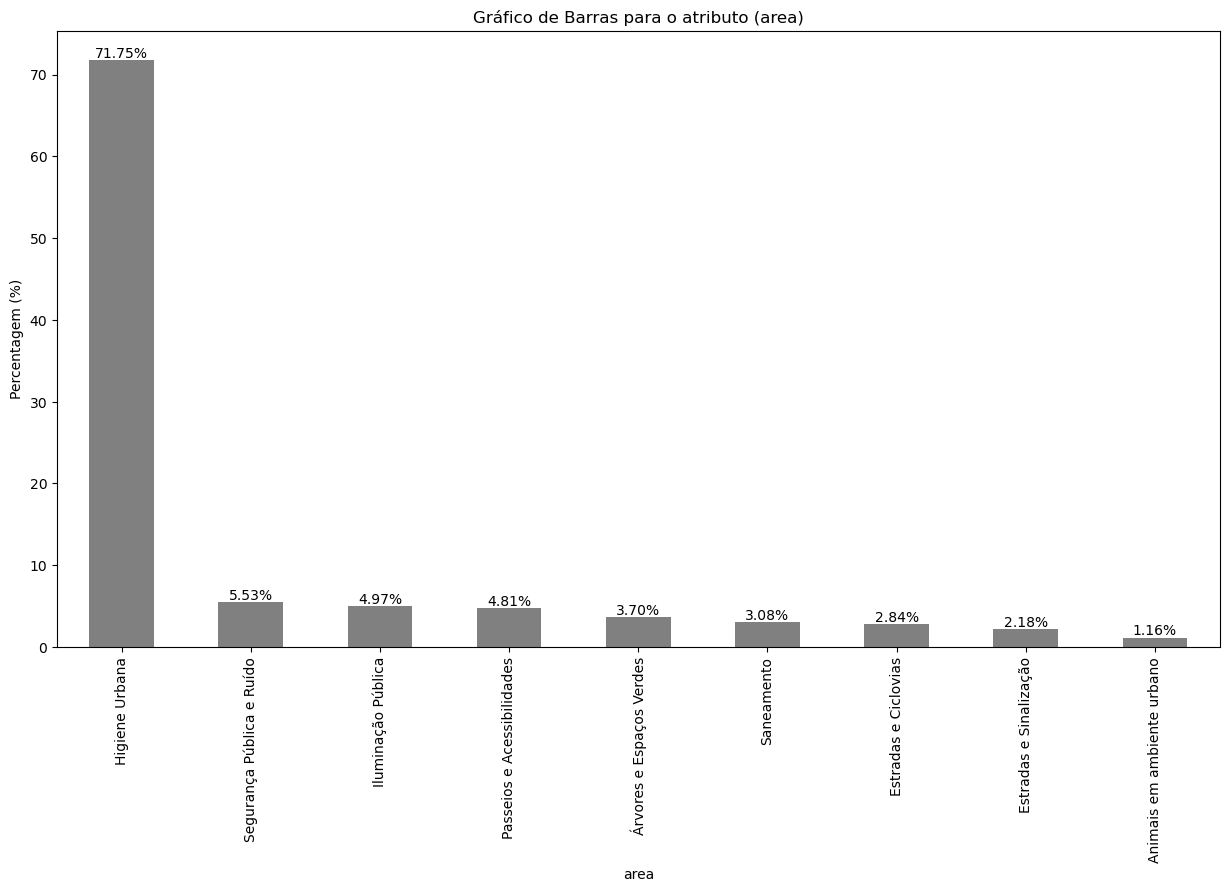

In [20]:
# Count values
value_counts = gopidataset.area.value_counts()
# Calculate %
percentages = ((value_counts / len(gopidataset)) * 100)


# Bar chart
plt.figure(figsize=(15, 8))
percentages.plot(kind='bar', color='grey')

# Add title and labels 
plt.xlabel('area')
plt.ylabel('Percentagem (%)')
plt.title('Gráfico de Barras para o atributo (area)')

# Add % at the top of the bars
for index, value in enumerate(percentages):
            plt.text(index, value + 0.3, f'{value:.2f}%', ha='center')


# Show plot
plt.show()

In [21]:
#Detailed info for attributes
print("--------Tipo--------\n")
#print(gopidataset.Freguesia.value_counts(normalize=True) * 100)

#Concatenate the value counts and frequency_percentage into a DataFrame
value_counts = gopidataset.tipo.value_counts()
frequency_percentage = (value_counts / len(gopidataset)) * 100
result_df = pd.concat([value_counts, frequency_percentage], axis=1)
result_df.columns = ['Absolute Count', 'Frequency (%)']
print(result_df)

--------Tipo--------

                                                    Absolute Count  \
tipo                                                                 
Remoção-Monstros-Pedido de recolha                          258496   
Entulhos, objetos volumosos, resíduos de jardim...           99381   
Remoção-Jardins-Pedido de recolha                            21354   
Candeeiro apagado                                            21243   
Pragas e doenças                                             21131   
Reclamações no âmbito da recolha diária de resí...           18452   
Grafitis                                                     17109   
Limpeza da via pública (Despejo de papeleira, v...           15989   
Árvores, arbustos ou relva - Manutenção                      13973   
Remoção Seletivas - Remoção pontual de papel/ca...           12632   
Contentores de resíduos danificados                          12378   
Sacos ou outros lixos abandonados                            11554  

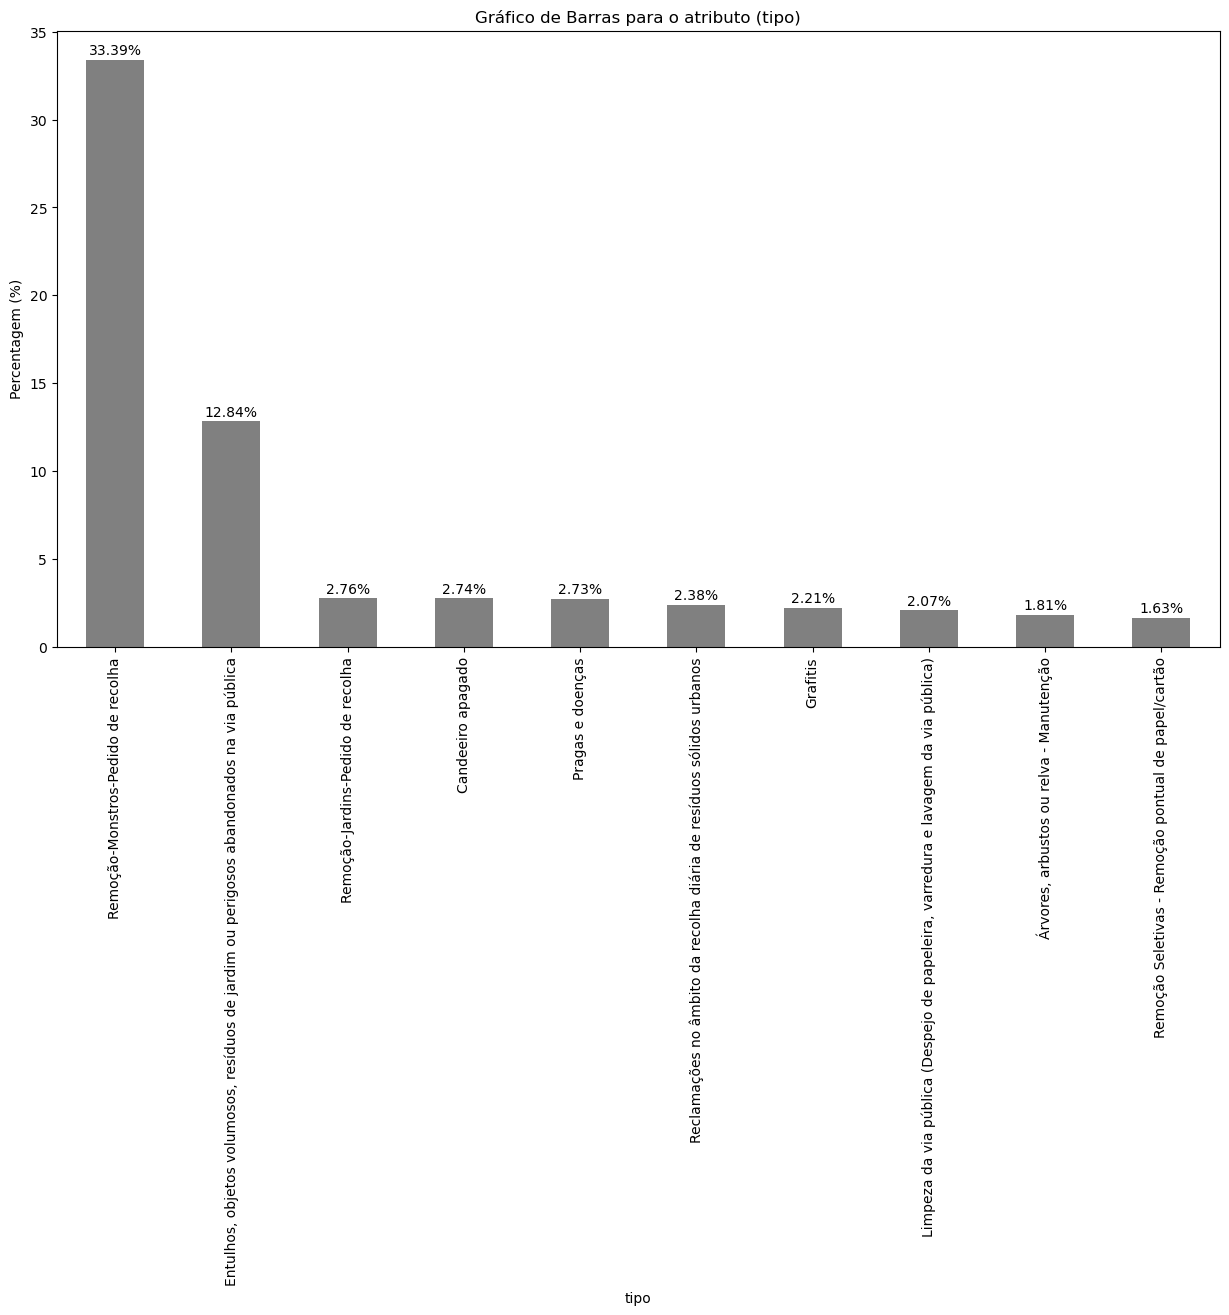

In [16]:
# Select top 10 values
value_counts = gopidataset.tipo.value_counts().head(10)

# Calculate %
percentages = (value_counts  / len(gopidataset)) * 100


# Create bar chart
plt.figure(figsize=(15, 8))
percentages.plot(kind='bar', color='grey')

# Add title and labels
plt.xlabel('tipo')
plt.ylabel('Percentagem (%)')
plt.title('Gráfico de Barras para o atributo (tipo)')

# Add % at the top of bar
for index, value in enumerate(percentages):
    plt.text(index, value + 0.3, f'{value:.2f}%', ha='center')

# Show plot
plt.show()

In [22]:
################################months to year transformation############################
gopidataset['dt_registo'] = gopidataset['dt_registo'].str.split(' ').str[0]
gopidataset['dt_registo'] = pd.to_datetime(gopidataset['dt_registo'], format='%Y-%m-%d', errors='coerce')
gopidataset['month'] =gopidataset['dt_registo'].dt.month
gopidataset['year'] =gopidataset['dt_registo'].dt.year


#frequency = gopidataset.groupby(['year', 'month']).size()
#percentage = frequency.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
#percentage1 = percentage.map('{:.2f}%'.format)
#print(percentage1)
#print(frequency)








In [23]:
#Dataset header
gopidataset.head(2)


,dt_registo,area,tipo,Subseccao,Freguesia,Longitude_Subseccao,Latitude_Subseccao,month,year
0,2018-01-01,Iluminação Pública,Candeeiro apagado,11066202005,Parque das Nações,-9.092716,38.779538,1,2018
1,2018-01-01,Árvores e Espaços Verdes,"Árvores, arbustos ou relva - Manutenção",11061802202,Lumiar,-9.157347,38.772386,1,2018


In [24]:
print("\nData base dimensions :", gopidataset.shape)
print("\nData base info:")
gopidataset.info()


Data base dimensions : (774072, 9)

Data base info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774072 entries, 0 to 774071
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dt_registo           774072 non-null  datetime64[ns]
 1   area                 774072 non-null  object        
 2   tipo                 774072 non-null  object        
 3   Subseccao            774072 non-null  int64         
 4   Freguesia            774072 non-null  object        
 5   Longitude_Subseccao  774072 non-null  float64       
 6   Latitude_Subseccao   774072 non-null  float64       
 7   month                774072 non-null  int32         
 8   year                 774072 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 47.2+ MB


In [25]:
nan_values_year = gopidataset['year'].isna().sum()  #gopidataset['year'].isnull()
nan_values_month = gopidataset['month'].isna().sum()  #gopidataset['month'].isnull()

# Print rows where 'month' column has NaN values
print(nan_values_year)
print(nan_values_month)


0
0


In [26]:
# Write the combined DataFrame to a single Excel file or CSV file
gopidataset.to_csv(csv_path/'combined_sorted_ym.gopi_data.csv',sep=',', index=False)

In [28]:
Occurrences per year/month.
frequency = gopidataset.groupby(['year', 'month']).size()
percentage = frequency.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
percentage1 = percentage.map('{:.2f}%'.format)
print(percentage1)
#print(frequency)

year  year  month
2018  2018  1         7.70%
            2         6.48%
            3         6.89%
            4         6.98%
            5         8.31%
            6         8.22%
            7         9.38%
            8         9.35%
            9        10.50%
            10       10.16%
            11        8.69%
            12        7.34%
2019  2019  1         8.13%
            2         7.64%
            3         7.69%
            4         7.55%
            5         8.98%
            6         7.99%
            7         9.87%
            8         8.16%
            9         9.17%
            10        8.97%
            11        8.63%
            12        7.24%
2020  2020  1         8.81%
            2         7.65%
            3         5.75%
            4         3.77%
            5         7.69%
            6         8.22%
            7         9.63%
            8         9.48%
            9        11.61%
            10       11.17%
            11        8.51%
  